In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
 
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
    pass

In [3]:
Y =  np.load("../leabra/y_16_100.npy")
X = np.load("../leabra/x_16_100.npy")

rng_state = np.random.get_state()
np.random.shuffle(X)
np.random.set_state(rng_state)
np.random.shuffle(Y)

input_shape = X[0].shape
output_shape = Y.shape[1]

'''
#This uses the preprocessing library to import images. 
#while it is more convienent, it seems to bring up issues with initializaiton of the model.

img_size = (200,200)
datagen = image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "/content/drive/MyDrive/shared/nets/leabra/",
    target_size=img_size,
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    subset="training",
)

test = datagen.flow_from_directory(
    "/content/drive/MyDrive/shared/nets/leabra/",
    target_size=img_size,
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    subset="validation",
)

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/DirectoryIterator#__getitem__
input_shape = train.__getitem__(0)[0][0].shape
output_shape = train.__getitem__(0)[1][0].shape[0]
'''

print(input_shape)
print(output_shape)

(100, 100, 1)
2


In [30]:
#https://medium.com/@schatty/image-augmentation-in-numpy-the-spell-is-simple-but-quite-unbreakable-e1af57bb50fd
def show_img(img, ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)

    
def plot_grid(imgs, nrows, ncols, figsize=(20,20)):
    assert len(imgs) == nrows*ncols, f"Number of images should be {nrows}x{ncols}"
    _, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        show_img(img, ax)
        
def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

def random_crop(img, crop_size=(10, 10)):
    assert crop_size[0] <= img.shape[0] and crop_size[1] <= img.shape[1], "Crop size should be less than image size"
    img = img.copy()
    w, h = img.shape[:2]
    x, y = np.random.randint(h-crop_size[0]), np.random.randint(w-crop_size[1])
    img = img[y:y+crop_size[0], x:x+crop_size[1]]
    return img

In [32]:
for i in range(10):
    X[i,:,:,:] = random_crop(X[i,:,:,:],0.4)
plot_grid(X[0:8,:,:,:],2,4)

TypeError: 'float' object is not subscriptable

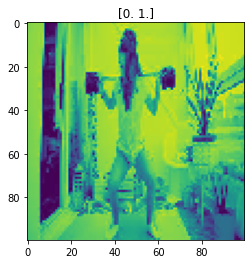

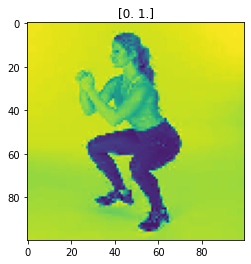

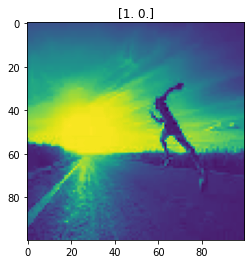

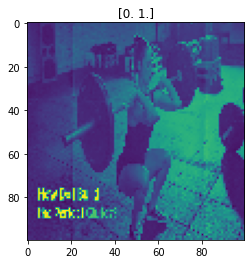

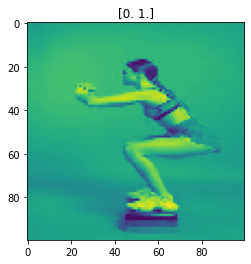

In [4]:
    for i in range(5):
        #plt.imshow(image.array_to_img(train.__getitem__(0)[0][i]))
        #plt.title(str(train.__getitem__(0)[1][i]))
        plt.imshow(image.array_to_img(X[i,:,:,:]))
        plt.title(str(Y[i]))
        plt.show()

In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(512, (6,6), activation='relu', input_shape=input_shape))
#model.add(keras.layers.Conv2D(256, (4,4), activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.5))
model.add(keras.layers.MaxPooling2D(pool_size=(4,4)))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(output_shape, activation='softmax'))
 
model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Adam(),
 metrics=[keras.metrics.CategoricalAccuracy()])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 95, 95, 512)       18944     
_________________________________________________________________
batch_normalization (BatchNo (None, 95, 95, 512)       2048      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 270848)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               34668672  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
'''
data_augmentation = keras.Sequential(50
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
 
    ])
 
classes = 2
inputs = keras.Input(shape=input_shape)
 
# Augment images
x = data_augmentation(inputs)
 
# Rescale image valuesY =  np.load("/content/drive/MyDrive/shared/nets/leabra/y_15.npy")
X = np.load("/content/drive/MyDrive/shared/nets/leabra/x_15.npy")
input_shape = X[0].shape
output_shape = Y.shape[1]



#x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
 32
# Add the rest of the model
outputs = layers.Conv2D(288, kernel_size=(5,5), activation='relu', input_shape=input_shape)(x)
#outputs = layers.BatchNormalization()(outputs)
#outputs = layers.Conv2D(512, (4,4), activation='relu')(outputs)model
#outputs = layers.BatchNormalization()(outputs)
outputs = layers.MaxPooling2D(pool_size=(2,2))(outputs)
outputs = layers.Dropout(0.4)(outputs)50
outputs = layers.Flatten()(outputs)
#outputs = layers.Dense(128, activation='relu')(outputs)
outputs = layers.Dense(64, activation='relu')(outputs)
outputs = layers.Dropout(0.5)(outputs)
outputs = layers.Dense(classes, activation='softmax')(outputs)
 
model = keras.Model(inputs, outputs)
 
model.compile(loss=keras.losses.CategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(),
                 metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()
 
keras.utils.plot_model(model,to_file='cnn-matt.png',
 show_shapes=True,expand_nested=True)
'''

'\ndata_augmentation = keras.Sequential(50\n    [\n        layers.experimental.preprocessing.RandomFlip("horizontal"),\n        layers.experimental.preprocessing.RandomRotation(0.3),\n \n    ])\n \nclasses = 2\ninputs = keras.Input(shape=input_shape)\n \n# Augment images\nx = data_augmentation(inputs)\n \n# Rescale image valuesY =  np.load("/content/drive/MyDrive/shared/nets/leabra/y_15.npy")\nX = np.load("/content/drive/MyDrive/shared/nets/leabra/x_15.npy")\ninput_shape = X[0].shape\noutput_shape = Y.shape[1]\n\n\n\n#x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)\n 32\n# Add the rest of the model\noutputs = layers.Conv2D(288, kernel_size=(5,5), activation=\'relu\', input_shape=input_shape)(x)\n#outputs = layers.BatchNormalization()(outputs)\n#outputs = layers.Conv2D(512, (4,4), activation=\'relu\')(outputs)model\n#outputs = layers.BatchNormalization()(outputs)\noutputs = layers.MaxPooling2D(pool_size=(2,2))(outputs)\noutputs = layers.Dropout(0.4)(outputs)50\noutputs = l

In [7]:
batch_size = 32
epochs = 50
history = model.fit(X,Y,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_split=0.2
 #validation_data=test
 )

Epoch 1/50
41/41 [==============================] - 6s 73ms/step - loss: 18.3331 - categorical_accuracy: 0.5477 - val_loss: 8.7420 - val_categorical_accuracy: 0.6006
Epoch 2/50
41/41 [==============================] - 3s 62ms/step - loss: 5.2203 - categorical_accuracy: 0.6117 - val_loss: 1.6799 - val_categorical_accuracy: 0.6254
Epoch 3/50
41/41 [==============================] - 2s 60ms/step - loss: 1.1340 - categorical_accuracy: 0.5983 - val_loss: 1.2567 - val_categorical_accuracy: 0.5697
Epoch 4/50
41/41 [==============================] - 2s 60ms/step - loss: 1.0896 - categorical_accuracy: 0.5836 - val_loss: 1.0492 - val_categorical_accuracy: 0.6471
Epoch 5/50
41/41 [==============================] - 2s 60ms/step - loss: 0.8788 - categorical_accuracy: 0.6444 - val_loss: 1.5771 - val_categorical_accuracy: 0.6749
Epoch 6/50
41/41 [==============================] - 2s 60ms/step - loss: 0.6418 - categorical_accuracy: 0.6571 - val_loss: 1.3811 - val_categorical_accuracy: 0.6130
Epoch 7/5

Test loss: 0.29760003089904785
Test accuracy: 0.910614550113678


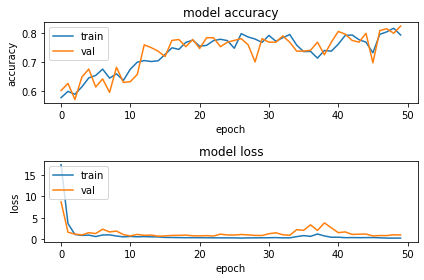

In [8]:
score = model.evaluate(X,Y, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])print(squat_preds[])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

### Verify the predictions being made
---

0
5


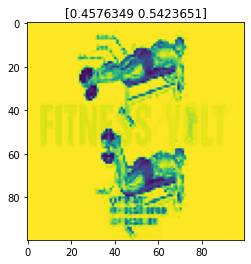

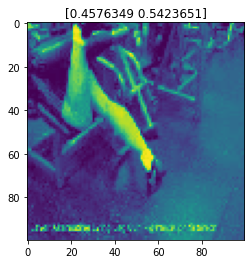

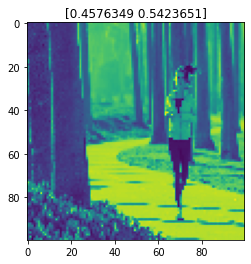

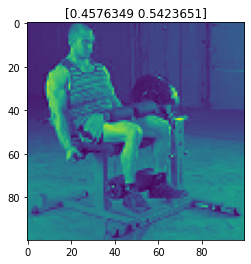

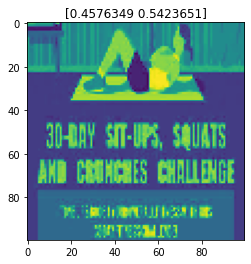

In [11]:
# Decode predictions didn't seem to work so well when not using
# xception network. This function should decode objects with 2 classes [0,1]


def decoder(one_pred):
    if one_pred[0] > one_pred[1]:
        return np.float32([1,0])
    else:
        return [0,1]

num_items = len(Y)
squat_preds = model.predict(X[0:num_items,:,:,:])

decoded = np.apply_along_axis(decoder, 1, squat_preds)

incorrect_squats = []
incorrect_non_squats = []
for i in range(100):
    if np.array_equal(decoded[i],Y[i]) == False:
        if Y[i][0] == 1:
            incorrect_non_squats.append(i)
        elif Y[i][1] == 0:
            incorrect_squats.append(i)

            
print(len(incorrect_squats))
print(len(incorrect_non_squats))
for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.title(squat_preds[i])
    plt.show()
    
# No cats classified incorrectly

for i in incorrect_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.title(squat_preds[i])
    plt.show()